In [1]:
#[E-05] RCP Classifier with TensorFlow

First, check the library that we will use

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(777)
print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4


Prepare RCP Datas

Load Datas and Resize Datas

In [3]:
from PIL import Image
import glob
import os

print("PIL Library import complete")

PIL Library import complete


<H2> INDEX </H2>

1. resize the images

2. load the images

3. load the test images

4. make a Sequential Model with Conv2D, Activation func='relu', MaxPooling2D , flatten, Dense... even Dropout

5. compile and fit the model

6. show the plot about train_acc (acc), val_acc(val_acc), train_loss (loss), val_loss (val_loss)

7. model.evaluate

8. show wrong predicted images!

9. retrospect




RCP datas will be resized to 28x28

In [4]:
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
    
    print(len(images), " images are ready to be resized")
    
    # change the size as 28x28 and save
    target_size=(28,28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    
    print(len(images), " images are resized ")
    
#load the scissor images from path
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("scissor IMG resize complete")

image_rock_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_rock_path)

print("rock IMG resize complete")

image_paper_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_paper_path)

print("paper IMG resize complete")

500  images are ready to be resized
500  images are resized 
scissor IMG resize complete
500  images are ready to be resized
500  images are resized 
rock IMG resize complete
500  images are ready to be resized
500  images are resized 
paper IMG resize complete


In [5]:
def load_data(img_path, number_of_data=1500):
    #scissor : 0, rock : 1 , paper: 2 to be labelled
    img_size=28
    color=3
    #make the matrix which includes IMG Datas and Label Datas
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels = np.zeros(number_of_data, dtype=np.int32)
    
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=0
        idx=idx+1
    
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=1
        idx=idx+1
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2
        idx=idx+1
    
    print("Number of Train Data(x_train) is ",idx)
    return imgs, labels

image_dir_path=os.getenv("HOME")+'/aiffel/rock_scissor_paper'
(x_train_use,y_train_use) = load_data(image_dir_path)
#x_train_use = np.concatenate((x_train, x_train2), axis = 0)
#y_train_use = np.concatenate((y_train, y_train2), axis = 0)


#input datas need to be 0~1  => normalized
x_train_norm = x_train_use/255.0

print('x_train shape: {}'.format(x_train_use.shape))
print('y_train shape: {}'.format(y_train_use.shape))


    

Number of Train Data(x_train) is  1500
x_train shape: (1500, 28, 28, 3)
y_train shape: (1500,)


imgs : initialized as 0 with size ( 300, 28, 28, 3)

labels : initalized as 0 with size (300)

and that imgs and labels will be changed as real IMG's numpy array

idx[0:100] : scissor

idx[100:200] : rock

idx[200:300] : paper

so idx is just initialized as a number 0



show the IMGs

label:  0


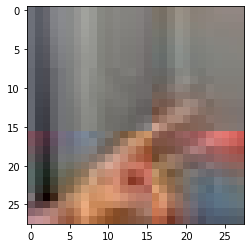

In [6]:
plt.imshow(x_train_use[5])
print('label: ', y_train_use[5])

Used Model: Seuquential
Conv2D, Activate='relu', MaxPool2D
flatten, Dense

-> in result, there are 3 outputs

모델은 다음과 같이 설정한다

- 분류 모델로써 순차모델을 사용

- 기본 conv2D의 활성화함수는 relu로 수행하겠다.

- conv2D, act, MaxPool2D의 3겹, Flatten하여 평활화 한 후 , Dense 3겹, 배치정규화, 드롭아웃을 통해 오버피팅 방지 후 최종 출력 3층 softmax



In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model = keras.models.Sequential()
#model.add(tf.keras.initializers.he_normal() )
act ='relu'
model.add(keras.layers.Conv2D(16,(3,3), activation=act, input_shape=(28,28,3) , padding='same'))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(32,(3,3), activation=act, padding='same'))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(64,(3,3), activation=act , padding='same'))
model.add(keras.layers.MaxPool2D((2,2)))
#64 
model.add(keras.layers.Flatten())
#model.add(keras.layers.Dense(128, activation=act)) #learnable layer - fully connectec layer   torch- linear
model.add(keras.layers.Dense(64, activation=act)) 
model.add(keras.layers.Dense(32, activation=act)) 
model.add(keras.layers.Dense(16, activation=act))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

To classify Multiclass (Scissor(0), Rock(1), Paper(2)), I use Adam optimizer, sparse_categorical_crossentropy loss, accuracy metric

In [8]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.

#model compile -> model Fit -> model Predict
#opt = tf.keras.optimizers.RMSprop(learning_rate = 0.01)
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#train model
history = model.fit(x_train_norm, y_train_use, validation_split = 0.2, batch_size = 24, epochs=20,  verbose=2)


Epoch 1/20
50/50 - 3s - loss: 0.9518 - accuracy: 0.5400 - val_loss: 1.1813 - val_accuracy: 0.0000e+00
Epoch 2/20
50/50 - 0s - loss: 0.6252 - accuracy: 0.7617 - val_loss: 1.3507 - val_accuracy: 0.0000e+00
Epoch 3/20
50/50 - 0s - loss: 0.4598 - accuracy: 0.8233 - val_loss: 1.1370 - val_accuracy: 0.0767
Epoch 4/20
50/50 - 0s - loss: 0.3415 - accuracy: 0.8875 - val_loss: 1.5581 - val_accuracy: 0.0000e+00
Epoch 5/20
50/50 - 0s - loss: 0.2909 - accuracy: 0.9033 - val_loss: 1.0407 - val_accuracy: 0.3200
Epoch 6/20
50/50 - 0s - loss: 0.2191 - accuracy: 0.9408 - val_loss: 0.9838 - val_accuracy: 0.4133
Epoch 7/20
50/50 - 0s - loss: 0.2033 - accuracy: 0.9300 - val_loss: 0.8436 - val_accuracy: 0.4267
Epoch 8/20
50/50 - 0s - loss: 0.1607 - accuracy: 0.9508 - val_loss: 5.2975 - val_accuracy: 0.0000e+00
Epoch 9/20
50/50 - 0s - loss: 0.1342 - accuracy: 0.9642 - val_loss: 0.1455 - val_accuracy: 0.9600
Epoch 10/20
50/50 - 0s - loss: 0.1183 - accuracy: 0.9717 - val_loss: 0.2413 - val_accuracy: 0.9267
Epo

<class 'dict'>


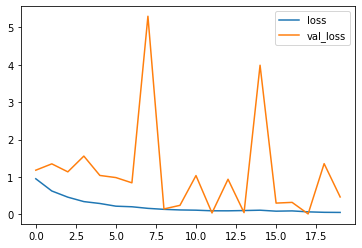

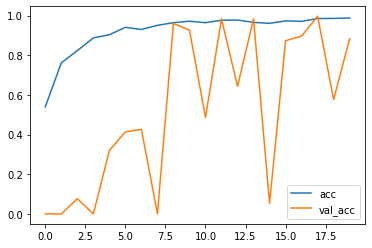

In [9]:
print(type(history.history))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc','val_acc'])
plt.show()

그래프가 많이 왔다갔다하는데 이를 좀더 평탄하게 하고싶지만 지식이 얕다

In [10]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
img_test_rock_path = os.getenv("HOME")+'/aiffel/rsp_test/rock'
img_test_scissor_path = os.getenv("HOME")+'/aiffel/rsp_test/scissor'
img_test_paper_path = os.getenv("HOME")+'/aiffel/rsp_test/paper'
resize_images(img_test_rock_path)
resize_images(img_test_scissor_path)
resize_images(img_test_paper_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rsp_test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0 
x_test_norm = x_test_norm.reshape(-1,28,28,3)
# 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images are ready to be resized
100  images are resized 
100  images are ready to be resized
100  images are resized 
100  images are ready to be resized
100  images are resized 
Number of Train Data(x_train) is  300
x_test shape: (1500, 28, 28, 3)
y_test shape: (1500,)


In [11]:
#모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss : {test_loss}")
print(f"test_accuracy : {test_accuracy}")

47/47 - 0s - loss: 0.7487 - accuracy: 0.8693
test_loss : 0.7486857175827026
test_accuracy : 0.8693333268165588


0.323333..이 나오게되서 어떻게 틀리는지 살펴보았다. -> 이미지 수를 늘려서 수행했더니 0.8693이 나왔다

In [12]:
predicted_result = model.predict(x_test_norm)
predicted_labels = np.argmax(predicted_result, axis=1)

[228, 161, 27, 100, 65]
틀린 이미지 갯수 :  196
예측확률분포 : [2.3917659e-07 9.9828243e-01 1.7174055e-03]
라벨 : 2, 예측결과: 1


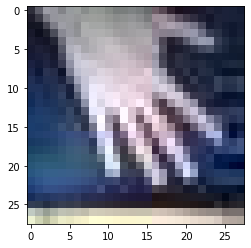

예측확률분포 : [9.8283976e-01 1.7153587e-02 6.6923403e-06]
라벨 : 1, 예측결과: 0


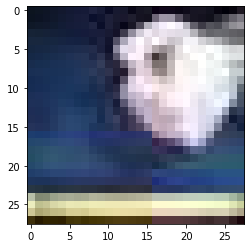

예측확률분포 : [6.6031527e-04 9.9933821e-01 1.4855755e-06]
라벨 : 0, 예측결과: 1


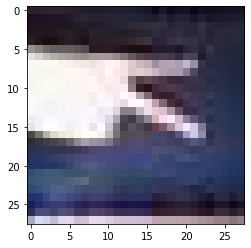

예측확률분포 : [9.1082591e-01 8.9173265e-02 8.4328678e-07]
라벨 : 1, 예측결과: 0


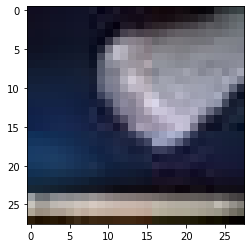

예측확률분포 : [1.6605831e-04 9.9983132e-01 2.5690072e-06]
라벨 : 0, 예측결과: 1


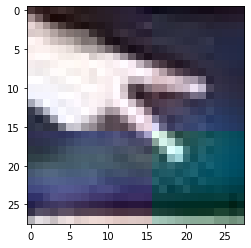

In [13]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    #i번째 test_labels와 y_test가 다른 경우만 모아보자
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
        
#wrong_predict_list에서 랜덤 5개만 뽑아보자
samples = random.choices(population = wrong_predict_list,k=5)
print(samples) #index값을 저장해놓은 wrong_predict_list에서 랜덤 5개 뽑앗으므로 결국 index값만 각 결과, 라벨에 넣어주면 나온다.
print("틀린 이미지 갯수 : ", len(wrong_predict_list))
for n in samples:
    print("예측확률분포 : " + str(predicted_result[n]))
    print("라벨 : "+ str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()
    
#0 가위, 1 바위 2 보

<h2> 회고</h2>
한번 영어로 쥬피터 노트북을 써보려해서 영어로 사용햇지만 나중의 내 이해를 위해 다시 한글로 썻다 ㅋㅋ

resize the images

load the images 500x3 =1500 , val 0.2 => 300 

load the test images 100 x 3 = 300

train : val : test = 1200 : 300 : 300 = 4:1:1

make a Sequential Model with Conv2D, Activation func='relu', MaxPooling2D , flatten, Dense... even Dropout

compile and fit the model (loss, acc, val_loss, val_acc)

show the plot about train_acc (acc), val_acc(val_acc), train_loss (loss), val_loss (val_loss) - visualization

model.evaluate (test acc, loss)

show wrong predicted images!

retrospect

다음의 과정을 거치면서 수행을 했다. 학습하거나 예측할떄 넣는 x 데이터는 /255를 통해 정규화를 수행한다 (color가 0~255이므로)

처음에는 데이터 300장만 가지고 모델훈련뒤 테스트를 돌려보았으나 0.29~ 0.47의 랜덤 acc들이 나왔고 loss도 4~9의 큰 수가 나왔다.

그래서 다른 그루분들의 손 사진데이터를 가지고 훈련하니 test에 대한 정확도가 0.86이 나왔다. 

결국 중요한것은 데이터셋의 풍부함 인 것 같다. 그거가지고도 안됬으면 데이터를 좀더 만지작 했을 것이다.

다른 데이터가지고도 이런식으로 학습시키고 예측하고싶은 마음이 있다. stable diffusion 세미나도 두번 들어봤는데

어려워던 내용이 태반이라 그 내용을 이해하기위해선 기본적으로 어떤 모델에는 어떤 파라미터를 두고 돌리는게 좋을지

기억하고 사용하는것이 유리할 것 같다. 

이 기본적인 내용을 기억하고 바로 문제에 적용하기위해선 많은 데이터에 대해서 다뤄보고, 또 모델을 설정해줘야 한다. 